

### Author - Niraj Dev Pandey 
`pandey@uni-hildesheim.de`

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from sklearn import datasets
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

### Visualization of the data-set

In [3]:
image_shape = (64, 64)

faces = X
n_samples, n_features = X.shape


def plot_face(ax, img, image_shape):
    vmax = max(img.max(), -img.min())
    ax.imshow(img.reshape(image_shape), cmap=plt.cm.gray,
              interpolation='nearest',
              vmin=-vmax, vmax=vmax)
    return ax

In [4]:
labels = y
# take images from only two individuals
X_flat = faces[(labels == 0) | (labels == 1)]
X = X_flat.reshape((20, 64, 64, 1))
Y = labels[(labels == 0) | (labels == 1)]

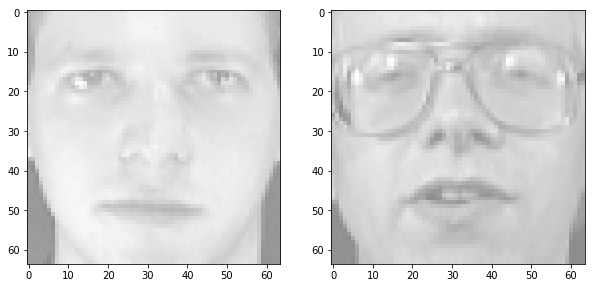

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0] = plot_face(ax[0], X[Y == 0][0], image_shape)
ax[1] = plot_face(ax[1], X[Y == 1][0], image_shape)
plt.savefig('olivetti1.jpg')
plt.show()

### Dividing the data into train and test

In [8]:
X_again = olivetti.data
y_again = olivetti.target

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_again,y_again, test_size=0.1,random_state=0)

In [10]:
Y_train.shape,Y_test.shape

((360,), (40,))

In [11]:
Y_train = Y_train.reshape(360,1)
Y_test = Y_test.reshape(40,1)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(360, 4096) float32
(40, 4096) float32


In [13]:
Y_train = np_utils.to_categorical(Y_train, 40)
Y_test = np_utils.to_categorical(Y_test, 40)

### Parameters initialization 

In [14]:
learning_rate = 0.01
training_epochs = 200
display_step = 10

In [15]:
x = tf.placeholder(tf.float32, [None, 4096], name='X')
y = tf.placeholder(tf.float32, [None, 40], name= 'Y')

In [16]:
W = tf.Variable(tf.zeros([4096, 40]), name= 'W')
b = tf.Variable(tf.zeros([40]), name= 'B')
tf.summary.histogram('weights', W)
tf.summary.histogram('biases', b)

<tf.Tensor 'biases:0' shape=() dtype=string>

In [17]:
w= np.random.randint((2),size=(4096,40))
a=np.matmul(X_train[1],w )
a.shape

(40,)

There are many activation function. Such as, linear, sigmoid& Tanh. Here we are defining softmax function

![softmax](activation_functions.png)

1. cross entropy as a loss
2. Gradient Descent optimizer

In [18]:
pred = tf.nn.softmax(tf.matmul(x, W) + b)
with tf.name_scope('loss'):
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
    
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [19]:

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter('C:/Users/Dell/Documents/DDA Lab/Exercise-05')

![title](tensors_flowing.gif "tensorboard session")

In [21]:
import numpy as np
import time
with tf.Session() as sess:
    sess.run(init)
    accuracy_train = []
    accuracy_test = []


    for epoch in range(training_epochs):

        idx = np.random.permutation(X_train.shape[0])
        for i in idx:

            _, c = sess.run([optimizer, cost], feed_dict={x: X_train[i:i+1],
                                                          y: Y_train[i:i+1]})

        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
            accuracy_train.append(accuracy.eval({x: X_train, y: Y_train}))
            accuracy_test.append(accuracy.eval({x: X_test, y: Y_test}))
            s = sess.run(merged_summary, feed_dict={x: X_train, y: Y_train})
            writer.add_summary(s, epoch)

    print ("completely Optimized!")
    print ("Your model Accuracy is:", accuracy.eval({x: X_test, y: Y_test}))
    %time()

Epoch: 0010 cost= 0.008482750
Epoch: 0020 cost= 0.000826044
Epoch: 0030 cost= 0.004761930
Epoch: 0040 cost= 0.000561216
Epoch: 0050 cost= 0.000601711
Epoch: 0060 cost= 0.001509016
Epoch: 0070 cost= 0.002568620
Epoch: 0080 cost= 0.007325714
Epoch: 0090 cost= 0.015319750
Epoch: 0100 cost= 0.003711128
Epoch: 0110 cost= 0.002937634
Epoch: 0120 cost= 0.004432833
Epoch: 0130 cost= 0.001397453
Epoch: 0140 cost= 0.003832642
Epoch: 0150 cost= 0.023327807
Epoch: 0160 cost= 0.002399998
Epoch: 0170 cost= 0.001890180
Epoch: 0180 cost= 0.001417330
Epoch: 0190 cost= 0.001423298
Epoch: 0200 cost= 0.002198667
completely Optimized!
Your model Accuracy is: 0.975
Wall time: 0 ns


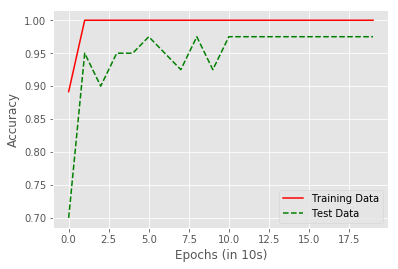

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(accuracy_train,'k-', label='Training Data',color ='r')
plt.plot(accuracy_test ,'k--', label='Test Data',color='g')
plt.xlabel("Epochs (in 10s)")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('accuracy.jpg')
plt.show()

In [21]:
writer.add_graph(sess.graph)

![title](tensorboard-2.gif "tensorboard visualization")

## Thanks a Lot